在回归术语中，我们把被预测的变量称为因变量（dependent variable），把用来预测因变量值的一个或多个变量称为自变量（independent variable）。

例如，在分析广告费用对销售收人的影响时，市场销售经理想要预测销售收入的愿望使我们想到，应该用销售收入作为因变量，而用来帮助预测销售收入的广告费用应作为自变量。

在统计符号上，$y$ 代表因变量，$x$ 代表自变量。

在本章中，我们仅仅讨论最简单类型的回归分析，它只包括一个自变量和一个因变量，二者之间的关
系可以用一条直线近似表示。这种回归分析被称为简单线性回归（simple linear regression）。

包括两个或两个以上自变量的回归分析被称为多元回归分析。多元回归和涉及曲线关系的情形，将在第 15 章和第 16 章中介绍。

# 简单线性回归模型

推荐教程：[Univariate Regression](http://web.vu.lt/mif/a.buteikis/wp-content/uploads/PE_Book/3-univariate-reg.html)

描述 $y$ 如何依赖于 $x$ 和误差项的方程称为回归模型（regression model）。

$$y = \beta_0 + \beta_1 x + \varepsilon$$

其中
- $\beta_0$ 和 $\beta_1$ 被称为模型的参数，不是一个随机变量，而是客观存在的，在现实中一定有的具体的量，正是因为有这两个参数，才使得 $x$ 可以影响 $y$。
- $\varepsilon$ 是一个随机变量，被称为模型的误差项。误差项说明了包含在 $y$ 里，但不能被 $x$ 和 $y$ 之间的线性关系解释的变异性。如果线性回归模型能够很好地描述 $y$ 的变动，那 $\varepsilon$ 一定是一个随机变动项，且均值为 0。

简单线性回归方程

$$E(y) = \beta_0 + \beta_1 x$$

- $\beta_0$ 是回归直线的 $y$ 轴截距
- $\beta_1$ 是斜率

## 样本估计的回归方程

$$\hat{y} = b_0 + b_1 x$$

- $b_0$ 和 $b_1$ 是总体参数 $\beta_0$ 和 $\beta_1$ 的样本估计量

总体回归直线只有一条，而样本回归直线，根据抽样结果的不同，会有很多条。

# 模型的假定

关于回归模型 $y=\beta_0 + \beta_1 x + \varepsilon$ 的误差项 $\varepsilon$ 的假定
1. 误差项 $\varepsilon$ 是一个平均值或期望值为 0 的随机变量，即 $E(\varepsilon) = 0$。

    这就意味着因为 $\beta_0$ 和 $\beta_1$ 都是常数，所以有 $E(\beta_0) = \beta_0$ 和 $E(\beta_1) = \beta_1$。对于一个给定的 $x$ 值，$y$ 的期望值是：

    $$E(y) = \beta_0 + \beta_1 x$$


2. 对所有的 $x$ 值，$\varepsilon$ 的方差都是相同的。我们用 $\sigma^2$ 表示 $\varepsilon$ 的方差。

    这就意味着 $y$ 关于回归直线的方差等于 $\sigma^2$ ，也就是说对所有的 $x$ 值，$y$ 的方差都是相等的。


3. $\varepsilon$ 的值是相互独立的。

    这就意味着对于一个特定的 $x$ 值，它所对应的值与任何其他的 $x$ 值所对应的值不相关。

    于是，对于一个特定的 $x$ 值，它所对应的 $y$ 值与任何其他的 $x$ 值所对应的 $y$ 值也不相关。


4. 对所有的 $x$ 值，误差项 $\varepsilon$ 是一个正态分布的随机变量。

    这就意味着因为 $y$ 是 $\varepsilon$ 的一个线性函数，所以对所有的 $x$ 值，$y$ 也是一个正态分布的随机变量。如果不是随机的，那就会产生内生性问题。

# 最小二乘法

最小二乘法是利用样本数据建立估计的回归方程的一种方法。（其中，二乘就是平方的意思）

假定由位于大学校园附近的 10 家 Armand 比萨饼连锁店组成了一个样本，并对这个样本采集有关数据。

对于样本中的第个观测值或第 i 家连锁店，$x_i$ 表示学生人数（单位：1000人），$y_i$ 表示季度销售收人（单位：1000美元）。

样本中 10 家 Armand 比萨饼连锁店的 $x_i$ 和 $y_i$ 的数值如下列所示。

我们看到对于第 1 家连锁店，$x_1=2$，$y_1=58$，表示这家连锁店位于有 2000 名学生的校园附近，它的季度销售收入为 58000 美元。

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from pathlib import Path
#设置数据文件夹路径
DATA = Path().resolve()  / 'data'

In [3]:
df = pd.read_csv(DATA / 'Armand\'s.csv')
df = df.set_index('Restaurant')
armand = df.iloc[:,0:2]
x = armand['Population']
y = armand['Sales']

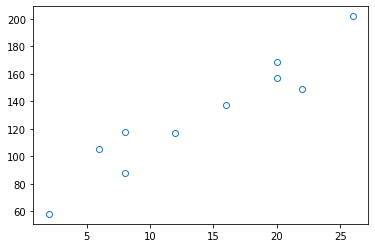

In [4]:
_ = plt.figure(0)
_ = plt.plot(x, y, linestyle = "None", marker = "o", markerfacecolor='none');
#_ = plt.legend(handles = legend_lines, loc = 'upper left')
plt.show()

最小二乘法准则

$$min\sum{(y_i - \hat{y}_i)^2}$$

其中：
- $y_i$ 为对于第 $i$ 次观测因变量的**观测**值；$\hat{y}_i$ 为对第 $i$ 次观测因变量的**预测**值，二者之差就是残差。残差是样本点与样本回归直线的**纵向距离**。实际上残差是样本回归直线不能够解释的，因变量方向的信息。

- 最小二乘法的目标，就是使得残差平方和最小。为什么要平方呢？因为方向有是正负，残差的原始值有可能是正的，也有可能是负的。平方是为了消除方向对计算的影响。

估计的回归方程的斜率和 $y$ 轴截距

$$b_1 = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sum{(x_i - \bar{x})^2}}$$

$$b_0 = \bar{y} - b_1\bar{x}$$

下面我们展示一下，最小二乘法的运算过程：

In [8]:
armand['x_i - bar x'] = armand['Population'] - armand['Population'].mean()
armand['y_i - bar y'] = armand['Sales'] - armand['Sales'].mean()
armand['(x_i - bar x)(y_i - bar y)'] = armand['x_i - bar x'] * armand['y_i - bar y']
armand['(x_i - bar x)^2'] = pow(armand['x_i - bar x'],2)
armand['(x_i - bar x)^2'].sum()
b_1 = armand['(x_i - bar x)(y_i - bar y)'].sum() / armand['(x_i - bar x)^2'].sum()
bar_y = armand['Sales'].mean()
bar_x = armand['Population'].mean()

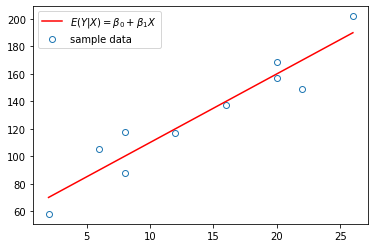

In [9]:
armand['y_ce'] = 60 + 5 * x
y_ce = armand['y_ce']

_ = plt.figure(0)
_ = plt.plot(x, y, linestyle = "None", marker = "o", markerfacecolor='none');
_ = plt.plot(x, y_ce, linestyle = "-", color = "red");
legend_lines = [Line2D([0], [0], color = "red", 
                        label='$E(Y|X) = \\beta_0 + \\beta_1 X$'),
                Line2D([0], [0], linestyle = "None", markerfacecolor = "None",
                      marker = "o", label='sample data')]
_ = plt.legend(handles = legend_lines, loc = 'upper left')
plt.show()

结合上面的结算结果可得：
- $b_1 = 5$
- $\bar{x} = 14$
- $\bar{y} = 130$
- $b_0 = \bar{y} - b_1 \bar{x} = 130 - 5 \times 14 = 60$

估计的回归方程是：

$$\hat{y} = 60 + 5x$$

我们再看一下，估计的回归方程的斜率和 $y$ 轴截距

$$b_1 = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sum{(x_i - \bar{x})^2}}$$

可以将其转化成

$$b_1 = \frac{Cov\left(x, y\right)}{Var\left(x\right)}$$

$$b_0 = \bar{y} - b_1\bar{x}$$

下面我们用一个随机生成的数据集来进行演示

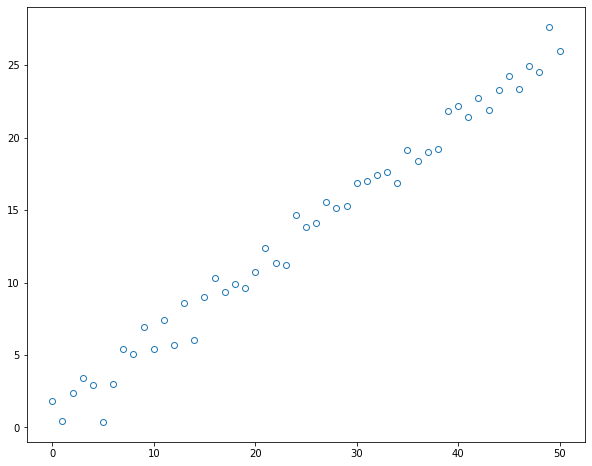

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#
np.random.seed(234)
# Set the coefficients:
N = 50
beta_0 = 1
beta_1 = 0.5
# Generate sample data:
x = np.arange(start = 0, stop = N + 1, step = 1)
#x = list(range(0, N + 1)) # not np.ndarray 
e = np.random.normal(loc = 0, scale = 1, size = len(x))
y = beta_0 + beta_1 * x + e
# Plot the data
_ = plt.figure(num = 0, figsize = (10, 8))
_ = plt.plot(x, y, linestyle = "None", marker = "o", markerfacecolor = 'none')
plt.show()

In [11]:
beta_1_est = np.cov(x, y, bias = True)[0][1] / np.var(x)
beta_0_est = np.mean(y) - beta_1_est * np.mean(x)
print("Estimated beta_0 = " + str(beta_0_est) + ". True beta_0 = " + str(beta_0))
print("Estimated beta_1 = " + str(beta_1_est) + ". True beta_1 = " + str(beta_1))
print("With bias = False (default) the estimate of beta_1 is biased: " + str(np.cov(x, y)[0][1] / np.var(x)))
print("With sample variance the estimate of beta_1 is unbiased: " +  str(np.cov(x, y)[0][1] / np.var(x, ddof = 1)))

Estimated beta_0 = 0.8385362094098401. True beta_0 = 1
Estimated beta_1 = 0.5099221954865624. True beta_1 = 0.5
With bias = False (default) the estimate of beta_1 is biased: 0.5201206393962936
With sample variance the estimate of beta_1 is unbiased: 0.5099221954865624


除了使用协方差，我们也可以使用矩阵计算出两个参数

In [12]:
x_mat = np.column_stack((np.ones(len(x)), x))
beta_mat = np.dot(np.linalg.inv(np.dot(np.transpose(x_mat), x_mat)), np.dot(np.transpose(x_mat), y))
print(beta_mat)
print(np.linalg.inv(x_mat.T @ x_mat) @ x_mat.T @ y)

[0.83853621 0.5099222 ]
[0.83853621 0.5099222 ]


In [13]:
import statsmodels.api as sm
#
x_mat = sm.add_constant(x)  # Add a constant column - not optional!
lm_model = sm.OLS(y, x_mat) # Create the OLS regression object
lm_fit = lm_model.fit()     # Estimate the parameters
print(lm_fit.params)        # Extract the parameter estimates

[0.83853621 0.5099222 ]


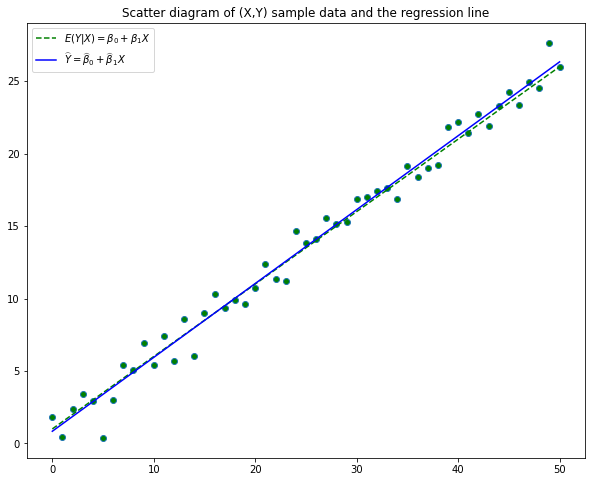

In [14]:
# The unknown DGP:
y_dgp = beta_0 + beta_1 * x
# The fitted values:
y_fit = beta_mat[0] + beta_mat[1] * x
# Plot the sample data
_ = plt.figure(num = 0, figsize = (10, 8))
_ = plt.plot(x, y, linestyle = "None", marker = "o", markerfacecolor = 'green')
_ = plt.title("Scatter diagram of (X,Y) sample data and the regression line")
# Plot the Unknown Population regression:
_ = plt.plot(x, y_dgp, linestyle = "--", color = "green", 
              label='$E(Y|X) = \\beta_0 + \\beta_1 X$')
# Plot the fitted regression line:
_ = plt.plot(x, y_fit, linestyle = "-", color = "blue",
              label='$\widehat{Y} = \widehat{\\beta}_0 + \widehat{\\beta}_1 X$')
_ = plt.legend()
plt.show()

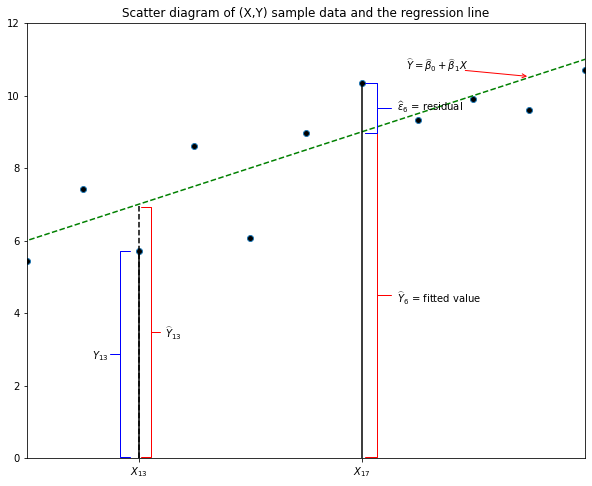

In [15]:
_ = plt.figure(num = 1, figsize=(10, 8))
_ = plt.plot(x, y, linestyle = "None", marker = "o", markerfacecolor = 'black')
_ = plt.ylim(ymin = 0, ymax = 12)
_ = plt.xlim(xmin = 10, xmax = 20)
_ = plt.title("Scatter diagram of (X,Y) sample data and the regression line")
_ = plt.plot(x, y_dgp, linestyle = "--", color = "green")
# Add Axis labels and ticks at specific positions:
_ = plt.xticks([x[12], x[16]], ["$X_{13}$", "$X_{17}$"])
# Add vertical lines:
_ = plt.plot([x[12], x[12]], [0, y_fit[12]], '--', color = "black")
_ = plt.plot([x[12], x[12]], [0, y[12]], '-', color = "black")
_ = plt.plot([x[16], x[16]], [0, y[16]], '-', color = "black")
# Add some brackets:
_ = plt.annotate("", xy = (x[12]*0.955, y[12] / 2), 
             xytext = (x[12]*0.975, y[12] / 2),
             arrowprops = dict(arrowstyle = "]-, widthA=10.3,lengthA=1",
                               connectionstyle = "arc", color='blue'))
_ = plt.annotate("", xy = (x[12]*1.015, y_fit[12] / 2),
             xytext = (x[12]*1.035, y_fit[12] / 2),
             arrowprops = dict(arrowstyle = "-[, widthB=12.5,lengthB=1",
                               connectionstyle = "arc", color='red'))
_ = plt.annotate("", xy = (x[16]*1.015, y_fit[16] / 2), 
             xytext = (x[16]*1.035, y_fit[16] / 2),
             arrowprops = dict(arrowstyle = "-[, widthB=16.2,lengthB=1.2",
                               connectionstyle = "arc", color='red'))
_ = plt.annotate("", xy = (x[16]*1.015, (y[16] + y_fit[16]) / 2),
             xytext = (x[16]*1.035, (y[16] + y_fit[16]) / 2),
             arrowprops = dict(arrowstyle = "-[, widthB=2.5,lengthB=1.2",
                               connectionstyle = "arc", color='blue'))
# Add Actual, Fitted and Residual indicator text:
_ = plt.text(x[12]*0.93, y[12] / 2.1, r'$Y_{13}$', fontsize = 10)
_ = plt.text(x[12]*1.04, y_fit[12] / 2.1, r'$\widehat{Y}_{13}$', fontsize = 10)
_ = plt.text(x[16]*1.04, y_fit[16] / 2.1, 
  r'$\widehat{Y}_6$ = fitted value', fontsize = 10)
_ = plt.text(x[16]*1.04, (y[16] + y_fit[16]) / 2.02, 
  r'$\widehat{\epsilon}_6$ = residual', fontsize = 10)
# Add Regression line
_ = plt.text(x[17] - 0.2, y[20], 
  r'$\widehat{Y} = \widehat{\beta}_0 + \widehat{\beta}_1 X$', fontsize = 10)
_ = plt.annotate("", xy = (x[19], y_fit[19]), xytext = (x[18]*0.99, y[20]),
            arrowprops = dict(arrowstyle = "->", 
                              connectionstyle = "arc", color='red'))
plt.show()

In [17]:
resid = y - y_fit
print("Sum of the residuals: " + str(sum(resid)))
print("Sum of X*resid: " + str(sum(np.array(resid) * np.array(x))))
print("Sample covariance of X and residuals: " + str(np.cov(resid, x)[0][1]))
print("Predicted value with mean(X): " + str(beta_mat[0] + beta_mat[1] * np.mean(x)))
print("Sample mean of Y: " + str(np.mean(y)))

sigma2_est = sum(resid**2) / (len(x) - 2)
var_beta = sigma2_est * np.linalg.inv(np.dot(np.transpose(x_mat), x_mat))
print(np.sqrt(np.diag(var_beta)))
print(lm_fit.bse)

Sum of the residuals: 2.2160051571518125e-13
Sum of X*resid: 9.563905223330949e-12
Sample covariance of X and residuals: 8.054223954445661e-14
Predicted value with mean(X): 13.586591096573896
Sample mean of Y: 13.5865910965739
[0.26999713 0.00930656]
[0.26999713 0.00930656]


In [18]:
np.random.seed(1)
# Set the sample size:
N = [10, 100, 1000]
#
beta_0_est = []
beta_1_est = []
# Generate samples of different sizes:
for n in N:
    x = np.arange(start = 0, stop = n + 1, step = 1)
    x_mat = np.column_stack((np.ones(len(x)), x))
    xtx = np.dot(np.transpose(x_mat), x_mat)
    # Repeatedly generate a random sample and estimate the parameters
    beta_0_temp = []
    beta_1_temp = []
    for smpl in range(0, 5000):
        # Generate Y:
        e = np.random.normal(loc = 0, scale = 1, size = len(x))
        y = beta_0 + beta_1 * x + e
        # Estimate the parameters:
        xty = np.dot(np.transpose(x_mat), y)
        beta_mat = np.dot(np.linalg.inv(xtx), xty)
        # Save the estimated parameters:
        beta_0_temp = np.append(beta_0_temp, [beta_mat[0]])
        beta_1_temp = np.append(beta_1_temp, [beta_mat[1]])
    # Save all the estimated parameters to one parameter matrix
    # each column represents the different sample size from N:
    if len(beta_0_est) == 0 and len(beta_1_est) == 0:
        beta_0_est = beta_0_temp
        beta_1_est = beta_1_temp
    else:
        beta_0_est = np.vstack((beta_0_est, beta_0_temp))
        beta_1_est = np.vstack((beta_1_est, beta_1_temp))

In [19]:
print("True beta_0 = " + str(beta_0) + ". True beta_1 = " + str(beta_1))
for i in range(0, len(N)):
    print("With N = " + str(N[i]) + ":" +
          " the AVERAGE of the estimated parameters:" +
          "\n\t beta_0: " + str(np.round(np.mean(beta_0_est[i]), 5)) +
          "\n\t beta_1: " + str(np.round(np.mean(beta_1_est[i]), 5)))
    print("With N = " + str(N[i]) + ":" +
          " the VARIANCE of the estimated parameters:" +
          "\n\t beta_0: " + str(np.round(np.var(beta_0_est[i]), 5)) + 
          "\n\t beta_1: " + str(np.round(np.var(beta_1_est[i]), 5)))
    print("\n")

True beta_0 = 1. True beta_1 = 0.5
With N = 10: the AVERAGE of the estimated parameters:
	 beta_0: 1.00437
	 beta_1: 0.49984
With N = 10: the VARIANCE of the estimated parameters:
	 beta_0: 0.3178
	 beta_1: 0.00904


With N = 100: the AVERAGE of the estimated parameters:
	 beta_0: 0.99789
	 beta_1: 0.50006
With N = 100: the VARIANCE of the estimated parameters:
	 beta_0: 0.03896
	 beta_1: 1e-05


With N = 1000: the AVERAGE of the estimated parameters:
	 beta_0: 0.99957
	 beta_1: 0.5
With N = 1000: the VARIANCE of the estimated parameters:
	 beta_0: 0.00394
	 beta_1: 0.0




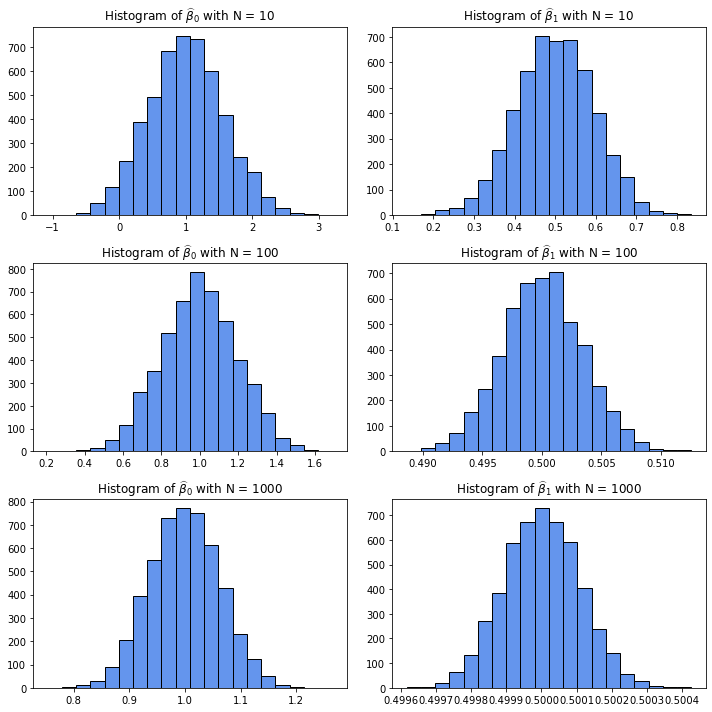

In [20]:
fig = plt.figure(figsize = (10, 10))
for i in range(0, len(N)):
    _ = fig.add_subplot(int('32' + str(i*2+1))).hist(beta_0_est[i], 
                    bins = 20, histtype = 'bar', 
                    color = "cornflowerblue", ec = 'black')
    _ = plt.title("Histogram of $\\widehat{\\beta}_0$ with N = " + str(N[i]))
    _ = fig.add_subplot(int('32' + str((i+1)*2))).hist(beta_1_est[i], 
                    bins = 20, histtype = 'bar', 
                    color = "cornflowerblue", ec = 'black')
    _ = plt.title("Histogram of $\\widehat{\\beta}_1$ with N = " + str(N[i]))
plt.tight_layout()
plt.show()

$\beta_0$ 和 $\beta_1$ 的几何意义：
- $\beta_0$：纵截距
- $\beta_1$：自变量 $x$：变动 a 个单位时，因变量 y 的变动幅度为 $\beta_1 \times x$ 

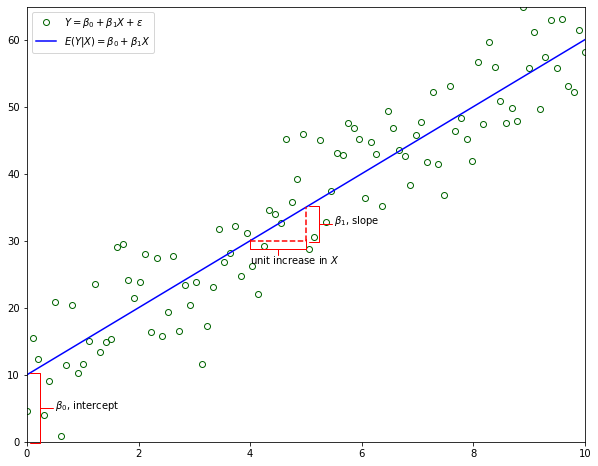

In [21]:
np.random.seed(123)
#
N = 100
beta_0 = 10
beta_1 = 5
x = np.linspace(start = 0, stop = 10, num = N)
e = np.random.normal(loc = 0, scale = 5, size = len(x))
y = beta_0 + beta_1 * x + e
# Conditional expectation of Y, given X
E_y = beta_0 + beta_1 * x
# Plot the data
_ = plt.figure(num = 1, figsize = (10, 8))
_ = plt.plot(x, y, linestyle = "None", marker = "o", 
            label = "$Y = \\beta_0 + \\beta_1 X + \\epsilon$",
            markerfacecolor = 'None', markeredgecolor = "darkgreen")
_ = plt.margins(x = 0)
_ = plt.ylim([0, max(y)])
# Plot the conditional expectation E(Y|X)
_ = plt.plot(x, E_y, linestyle = "-", color = "blue", 
            label='$E(Y|X) = \\beta_0 + \\beta_1 X$')
# plot beta_0
_ = plt.annotate("", xy = (0.5, E_y[0] / 2), 
             xytext = (0.2, E_y[0] / 2),
             arrowprops = dict(arrowstyle = "]-, widthA=3.5,lengthA=1",
                               connectionstyle = "arc", color='red'))
_ = plt.text(0.5, E_y[0] / 2, '$\\beta_0$, intercept', fontsize = 10)
# plot beta_1
_ = plt.plot([4, 5], [beta_0 + beta_1 * 4]*2, 
            linestyle = "--", color = "red")
_ = plt.plot([5, 5], beta_0 + beta_1 * np.array([4, 5]), 
            linestyle = "--", color = "red")
_ = plt.annotate("", xy = (5.5, beta_0 + beta_1 * 4.5), 
             xytext = (5.2, beta_0 + beta_1 * 4.5),
             arrowprops = dict(arrowstyle = "]-, widthA=1.8,lengthA=1",
                               connectionstyle = "arc", color='red'))
_ = plt.text(4, beta_0 + beta_1 * 3.3, 'unit increase in $X$', fontsize = 10)
_ = plt.annotate("", xy = (4.5, beta_0 + beta_1 * 3.5), 
             xytext = (4.5, beta_0 + beta_1 * 3.8),
             arrowprops = dict(arrowstyle = "]-, widthA=2.8,lengthA=1",
                               connectionstyle = "arc", color='red'))
_ = plt.text(5.5, beta_0 + beta_1 * 4.5, '$\\beta_1$, slope', fontsize = 10)
_ = plt.legend()
plt.show()

# 判定系数

判定系数由三个部分组成：

- 总平方和：代表全部数据的离散程度

$$ SST = \sum{(y_i - \bar{y})^2} $$

- 回归平方和：具体的样本回归方程 $\hat{y}$ 和整体的回归直线 $\bar{y}$ 之间的距离。SSR 实际上就是回归方程能够解释的那部分离散程度。

$$ SSR = \sum{(\hat{y} - \bar{y})^2} $$

- 误差平方和：

$$ SSE = \sum{(y_i - \hat{y}_i)^2} $$

- $y_i$：因变量的观测值
- $\hat{y}_i$：因变量的预测值
- $\bar{y}$：因变量的均值

$$ SST = SSR + SSE $$

$$ r^2 = \frac{SSR}{SST} $$

实际的意义就是：回归方程，整体而言，在多大程度上能够解释全部的数据离散程度（离散程度 = 数据蕴含的的信息）。

决定系数：现有的方程能够诠释多少原始的统计信息。

我们来看看，案例数据的这几个统计量：

In [22]:
df = pd.read_csv(DATA / 'Armand\'s.csv')
df = df.set_index('Restaurant')
armand = df.iloc[:,0:2]
armand.head()

,Population,Sales
Restaurant,,
1,2,58
2,6,105
3,8,88
4,8,118
5,12,117


In [23]:
armand['hat y'] = 60 + 5 * armand['Population']
armand['y_i - hat y'] = armand['Sales'] - armand['hat y']
armand['SSE'] = pow(armand['y_i - hat y'], 2)
armand['y_i - bar y'] = armand['Sales'] - armand['Sales'].mean()
armand['SST'] = pow(armand['y_i - bar y'], 2)
armand['hat y - bar y'] = armand['hat y'] - armand['Sales'].mean()
armand['SSR'] = pow(armand['hat y - bar y'], 2)
armand

,Population,Sales,hat y,y_i - hat y,SSE,y_i - bar y,SST,hat y - bar y,SSR
Restaurant,,,,,,,,,
1,2,58,70,-12,144,-72.0,5184.0,-60.0,3600.0
2,6,105,90,15,225,-25.0,625.0,-40.0,1600.0
3,8,88,100,-12,144,-42.0,1764.0,-30.0,900.0
4,8,118,100,18,324,-12.0,144.0,-30.0,900.0
5,12,117,120,-3,9,-13.0,169.0,-10.0,100.0
6,16,137,140,-3,9,7.0,49.0,10.0,100.0
7,20,157,160,-3,9,27.0,729.0,30.0,900.0
8,20,169,160,9,81,39.0,1521.0,30.0,900.0
9,22,149,170,-21,441,19.0,361.0,40.0,1600.0


In [26]:
armand['SSE'].sum()

1530

In [27]:
armand['SSR'].sum()

14200.0

In [28]:
armand['SST'].sum()

15730.0

In [29]:
r_square = armand['SSR'].sum()/armand['SST'].sum()
r_square

0.9027336300063573

# 显著性检验

在一个简单线性回归方程里，$y$ 的平均值或期望值是 $x$ 的一个线性函数，即 $E(y)=\beta_0 + \beta_1 x$。如果 $\beta_1$ 的值是 0，$E(y)=\beta_0 + 0x =\beta_0$。在这种情况下，$y$ 的平均值或期望值不依赖于 $x$ 的值，因此我们的结论是两变量 $x$ 和 $y$ 之间不存在线性关系。

换一种说法，如果 $\beta_1$ 的值不等于 0，我们的结论是两变量 $x$ 和 $y$ 之间存在线性关系。于是，为了检验两变量之间是否存在一个显著的回归关系，我们必须进行一个假设检验，用来判定 $\beta_1$ 的值是否等于0。

通常使用的检验方法有两种，这两种方法都需要知道回归模型误差项 $\varepsilon$ 的方差 $\sigma^2$ 的估计值。

## $\sigma^2$ 的估计
从回归模型和它的假定中，我们可以得出结论，$\varepsilon$ 的方差 $\sigma^2$ 也是因变量 $y$ 的值关于回归直线的方差。

回想一下，我们曾经将 $y$ 的值关于估计的回归直线的离差 $y_i - \hat{y}_i$ 称为残差。所以，残差平方和 SSE 是实际观测值关于估计的回归直线变异性的度量。我们用 SSE 除以它自己的自由度，得到均方误差（mean square error，MSE）。均方误差给出了 $\sigma^2$ 的一个估计量。

因为 $\hat{y} = b_0 + b_1 x$，所以 SSE 可以写成：

$$ SSE = \sum{(y_i - \hat{y}_i)^2} = \sum{(y_i - b_0 -b_1 x_i)^2} $$

回顾一下方差的计算公式：

$$\displaystyle Var=\frac{\sum(离差)^2}{样本数}=\frac{\sum(y_i-\bar{y})^2}{n}$$

由于我们估计 $y_i$ 的均值 $\bar{y} = \hat{y}_i$，所以我们可以用 $\hat{y}_i$ 替换 $\bar{y}$。

总体均方误差（$\sigma^2$ 的估计量）又称估计的方差

$$s^2 = MSE = \frac{SSE}{n-2}$$

为什么这里的自由度是 $n-2$ 呢？因为我们之前计算 SSE 的时候，必须估计两个参数 $\beta_0$ 和 $\beta_1$，所以自由度是  $n-2$ 

由于我们之前已经得到 SSE = 1530，于是 $\sigma^2$ 的一个无偏估计是：

$$s^2 = MSE = \frac{SSE}{n-2} = \frac{1530}{10-2} = 191.25$$

$$s = \sqrt{MSE} = 13.829$$

实际上，最小二乘的估计量 $b_0$ 和 $b_1$ 是一个样本统计量，有自己的抽样分布（服从正态分布），$b_1$ 抽样分布的性质如下：
- 期望值：$E(b_1) = \beta_1$
- 标准差：
$$\sigma_{b_1} = \frac{\sigma}{\sqrt{\sum{(x_i - \bar{x})^2}}}$$

如果我们此时想对简单线性回归模型 $y = \beta_0 + \beta_1 x + \varepsilon$，进行检验，如果 $x$ 和 $y$ 之间存在一个线性关系，必须有 $\beta_1 \ne 0$。$t$ 检验的目的是我们能否断定 $\beta_1 \ne 0$。因此需要利用样本来检验下面关于参数 $\beta_1$ 的假设：

\$$H_0: \beta_1 = 0 \ \ \ \ \ H_{\alpha}: \beta_1 \ne 0$$

回顾一下，根据总体标准差估计样本标准差的方式：

$$s_\bar{X} = \frac{总体标准差}{\sqrt{样本数量}} = \frac{s}{\sqrt{n}}$$

根据总体的均方误差（$\sigma^2$ 的估计量），我们可以计算出样本回归方程 $\hat{y} = b_0 + b_1 x$ 的 $b_1$ 标准差：

$$s_{b_1} = \frac{s}{\sqrt{\sum{(x_i - \bar{x})^2}}}$$

>为什么这里能把样本数量，换成 $\sum{(x_i - \bar{x})^2}$ 呢？我在学的时候也没有搞明白。

由于我们已知 $s = 13.829$，$\sum{(x_i - \bar{x})^2} = 568$，则我们可以知道 $b_1$ 的估计的标准差为：

$$s_{b_1} = \frac{13.829}{\sqrt{568}} = 0.5803$$

对于两个变量之间是否存在一个显著关系的 $t$ 检验的依据是检验统计量

$$t = \frac{b_1 - \beta_1}{s_{b_1}}$$

如果零假设成立，则 $\beta_1 = 0$，此时

$$t = \frac{b_1 - \beta_1}{s_{b_1}} = \frac{b_1}{s_{b_1}} = \frac{5}{0.5803} = 8.62$$

显然我们可以拒绝零假设。

这里计算的方差，实际上是每个样本点的 $y_i$ 值，与回归方程 $\hat{y}_i$ 的偏差，也就是前文提到的误差项 $\varepsilon$，误差项 $\varepsilon$ 是一个平均值或期望值为 0 的随机变量，即 $E(\varepsilon) = 0$。

估计的标准误差 $s_y$ 是对各观测数据在回归直线周围分散程度的一个度量值，可以证明 $s_y$ 是对误差项 $\varepsilon$ 的标准差  $\sigma$ 的无偏估计。

$$s_y = \sqrt{\frac{SSE}{n-2}} = \sqrt{MSE}$$

估计的标准误差 $s_y$ 反映了用估计的回归方程拟合因变量 $y$ 时平均误差的大小：
- 观测数据越靠近回归直线，$s_y$ 就越小，回归直线对各观测数据的代表性就越好
- 与 $r^2$ 不同，估计标准误差是一个有单位的绝对数

# 线性回归：贝叶斯视角

上面的简单线性回归的推导和原理，其实是频率学派的观点，贝叶斯学派对线性回归算法的理解是不一样的。

相关内容参考《用Python动手学统计学》第四章内容，下面的代码也是参考该书

In [39]:
# 用于数值计算的库
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 用于绘图的库
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 用于估计统计模型的库 (部分版本会报出警告信息)
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 设置浮点数打印精度
%precision 3
# 在 Jupyter Notebook 里显示图形
%matplotlib inline

In [45]:
# 读入数据
beer = pd.read_csv(DATA /"beer.csv")
beer.head()

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8


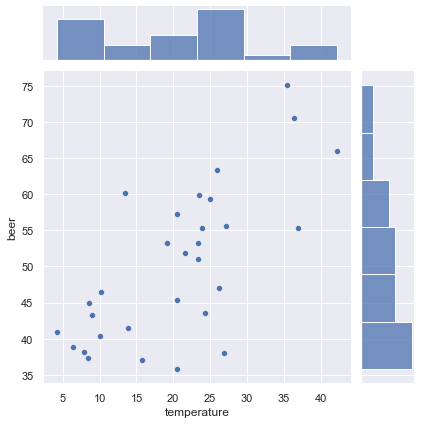

In [41]:
# 绘制图像
sns.jointplot(x = "temperature", y = "beer", data = beer)

以上是以横轴为气温、纵轴为啤酒销售额绘制出的二者关系的散点图。从图中可以看出，气温越高，啤酒销售额也越高。

建立如下的啤酒销售额模型：

啤酒销售额 $N \sim \left(\beta_0 + \beta_1 \times 气温, \sigma^2\right)$

这是正态线性模型，其中，响应变量为啤酒销售额，解释变量只有气温这一个。要完成这个模型，只需确定它是否需要包含气温即可。在估计参数时只估计式中的 $\beta_0$ 和 $\beta_1$，忽略多余参数 $\sigma^2$。

进行建模的作用有以下几个：

- 如果通过检验确认了系数 $\beta_1$ 不为 0，就可以认为“气温会影响啤酒销售额”。
- 也可以使用 AIC 代替假设检验来进行模型选择。如果通过 AIC 确认系数 $\beta_1$ 不为 0，则可以理解为“要预测啤酒销售额，气温是必需的”。
- 根据系数 $\beta_1$ 的正负，可以确认随着气温的升高，啤酒销售额是升高还是降低。
- 可以进行预测根据系数 $\beta_0$、$\beta_1$ 和气温可以预测啤酒销售额的期望值。我们可以根据模型公式预测当气温为 n °C时啤酒销售额在 $\beta_0 + \beta_1 \times 气温$ 日元左右。

接下来建立正态线性模型。为了估计统计模型，我们通过 `import statsmodels.formula.api as smf` 语句导入了 `statsmodels`。这个包可以让我们轻松地建模。

代码中用到了 `smf.ols` 函数。OLS 是普通最小二乘法的英文 Ordinary LeastSquares 的缩写。它与假设总体服从正态分布时的最大似然法的结果相等。

定义模型结构的参数是 `formula`。`"beer ~ temperature"` 代表模型的响应变量为 `beer`，解释变量为 `temperature`。

通过改变 `formula` 的值，我们可以定义多种多样的模型，相关功能将在估计更复杂的模型时进行说明。

在设置 `formula` 的同时，还要给出与之对应的数据帧，才算完成了模型的定义。

在写代码时不要忘了最后的 `.fit()` 方法，它的功能是自动完成直到参数估计的所有过程。

In [ ]:
# 使用 statsmodels 建模
lm_model = smf.ols(formula = "beer ~ temperature", data = beer).fit()

## 评估模型

原则上我们应该在预测之前评估模型。模型的评估以分析残差为主。

正态线性模型的残差应该服从均值为 0 的正态分布，所以这里我们要检查残差是否满足这个条件。获取残差的方式如下。

In [73]:
# 获得残差
resid = lm_model.resid
resid.head()

0    -5.001481
1     5.554095
2    -1.864491
3   -17.200217
4    -9.703971
dtype: float64

在实践上只需做到这一步即可，但为了加深印象，我们手动计算一下残差。

In [76]:
# 计算拟合值
y_hat = beta0 + beta1 * beer.temperature

In [77]:
# 获得拟合值
lm_model.fittedvalues.head()

0    50.301481
1    53.745905
2    42.264491
3    55.200217
4    46.703971
dtype: float64

In [86]:
# 手动计算残差
(beer.beer - y_hat).head()

0    -5.001481
1     5.554095
2    -1.864491
3   -17.200217
4    -9.703971
dtype: float64

要观察残差的特征，最简单的方法就是绘制出它的直方图。根据下面的残差的直方图，我们可以判断它是否服从正态分布

<AxesSubplot:ylabel='Count'>

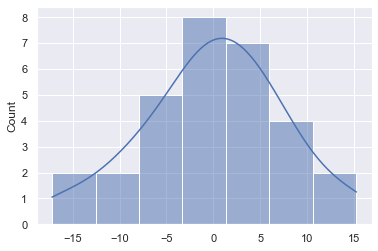

In [87]:
# 残差的直方图
sns.histplot(resid, kde=True)

可见残差大致左右对称，形状也接近正态分布。

下面绘制横轴为拟合值、纵轴为残差的散点图。该图看起来是随机的，各数据都不相关，也没有出现极端值

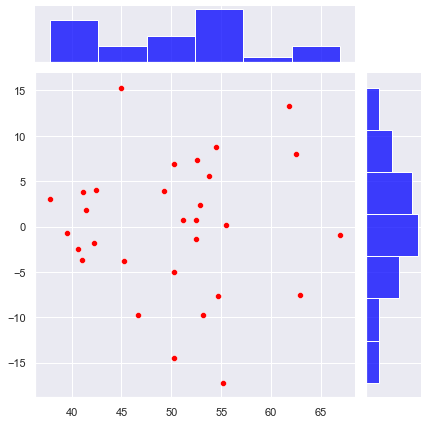

In [88]:
# 残差的散点图
sns.jointplot(x = lm_model.fittedvalues, y = resid, 
              joint_kws={"color": "red"}, 
              marginal_kws={"color": "blue"})

分位图是用来比较理论分位数（theoretical quantiles）与实际分位数（sample quantiles）的散点图，也叫 Q-Q 图。

Q 是 Quantile 的缩写。我们在 3-1 节计算过四分位数，即把数据按升序排列后位于第 25% 和第 75% 位置上的数据。

本节将计算数据的所有分位数，如果数据有 100 个，那么每 1% 取 1个位置，就能得到 100 个分位数。

正态分布的百分位数就是理论分位数，通过图形对比理论分位数与真实数据的分位数，可以直观地判断残差是否服从正态分布。

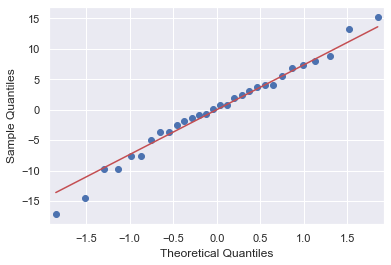

In [89]:
# 分位图
fig = sm.qqplot(resid, line = "s")

为了理解分位图的原理，我们可以尝试绘制一下。

首先，将数据按升序排列。

In [91]:
# 递增排列
resid_sort = resid.sort_values()

In [94]:
# 样本个数
len(resid_sort)

30

对 30 个数据全部执行上述计算，得到理论上的累积概率。

In [95]:
# 按样本容量变换为 0 到 1 的范围, 得到理论累积概率
nobs = len(resid_sort)
cdf = np.arange(1, nobs + 1) / (nobs + 1)

# 累积概率对应的百分位数
ppf = stats.norm.ppf(cdf)

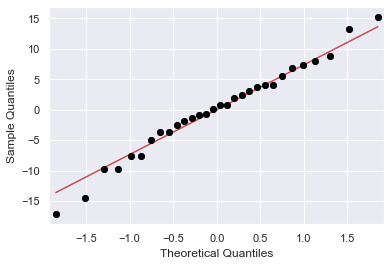

In [96]:
# 参考: 横轴为理论分位数, 纵轴为已排序的实际数据, 绘出的散点图就是分位图
fig = sm.qqplot(resid, line = "s")

plt.plot(stats.norm.ppf(cdf), resid_sort, "o", color = "black")

In [97]:
# 估计的结果
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           1.11e-05
Time:                        11:55:39   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

根据 summary 函数的输出分析残差残差的分析结果是 summary 输出的第 3 个表，输出的信息比较丰富，下面简单讲解一下。

- Prob(Omnibus) 和 Prob(JB) 是残差的正态性检验结果。
    - 零假设：残差服从正态分布。
    - 备择假设：残差不服从正态分布。
    - 这里的 $p$ 值大于 0.05。由检验的非对称性可知，$p$ 值大于 0.05 不代表残差确实服从正态分布。

此处的检验只能用来判断结果是否存在明显的问题。要判断残差是否服从正态分布，还要观察 Skew（偏度）和 Kurtosis（峰度）的值。
- 偏度表示直方图左右非对称性的方向和程度。偏度大于 0，则图形的右侧更宽。正态分布左右对称，所以它的偏度为 0。
- 峰度表示直方图中心附近的尖锐程度。峰度越高，图形显得越尖锐。正态分布的峰度为 3。

Durbin-Watson 表示残差的自相关程度，如果它的值在 2 附近，就说明没什么问题。在分析时间序列的数据时必须判断它是否在 2 附近。

如果残差自相关，系数的 $t$ 检验结果便不可信，这个现象叫作伪回归。如果Durbin-Watson 统计量远大于 2，就需要使用广义最小二乘法进一步讨论了。

## 解读模型结果

输出的信息包含以上 3 个表格，首先来看一下第 2 个表中的 Intercept 和 Temperature。

Intercept 和 Temperature 对应以下模型中的 $\beta_0$ 和 $\beta_1$：

啤酒销售额 $N \sim \left(\beta_0 + \beta_1 \times 气温, \sigma^2\right)$

- Coef 列是系数的值，右边的列依次为系数的标准误差、$p$ 值、零假设为“系数为 0”时的 $p$ 值、95% 置信区间的下置信界限与上置信界限。
- $p$ 值很小，在 3 位小数内显示为 0，此时认为气温的系数与 0 之间存在显著性差异。
- 通过上表可知，气温会影响啤酒销售额。系数的值 0.7654 为正数，说明气温越高啤酒销售额越高。上述解读可以从散点图中直接看出来。但如果解释变量更多，模型更复杂，建模并求出系数可以简化对现象的解读。

本节介绍一下上一节中第 1 个表（即上表）的含义（第 3 个表将在评估模型时使用）。
- Dep.Variable：响应变量的名称，Dep 为 Depended 的缩写。
- Model/Method：表示这里使用了普通最小二乘法（OLS）。
- Date/Time：对模型进行估计的日期和时间。
- No.Observations：样本容量。
- Df Residuals：样本容量减去参与估计的参数个数。
- Df Model：用到的解释变量的个数（不是参数个数）。
- Covariance Type：协方差类型，默认为 nonrobust。
- R-Squared/Adj.R-Squared：决定系数与修正决定系数（见后文）。
- F-statistic/Prob(F-statistic)：方差分析的结果（见 5-2 节）。
- Log-Likelihood：最大对数似然。
- AIC：赤池信息量准则。
- BIC：贝叶斯信息量准则，属于信息量准则的一种，本书不进行介绍。

不同版本的库在细节上可能有所差异。对于上表，我们只需关注样本容量、决定系数及 AIC 即可。

## 使用 AIC 进行模型选择

### 背景
AIC 是赤池信息量准则（Akaike information criterion）的缩写，是衡量统计模型拟合优良性的一种标准，是由日本统计学家赤池弘次创立和发展的。赤池信息量准则建立在熵的概念基础上，可以权衡所估计模型的复杂度和此模型拟合数据的优良性。

Akaike 信息准则是由统计学家Hirotugu Akaike制定的。它最初被命名为“信息标准”。Akaike 在 1971 年的一次研讨会上首次用英文宣布；研讨会论文集于 1973 年出版。然而，1973 年的出版物只是对这些概念的非正式介绍。第一个正式出版物是 1974 年 Akaike 的一篇论文。截至 2014年10 月，这篇 1974 年的论文在Web of Science 上的引用次数超过 14,000 次：使其成为有史以来被引用次数最多的研究论文第 73 位。

如今，AIC 已经变得足够普遍，以至于经常在不引用 Akaike 1974 年论文的情况下使用它。事实上，有超过 150,000 篇学术文章/书籍使用 AIC（由Google Scholar评估）。

AIC 的初始推导依赖于一些强有力的假设。Takeuchi (1976) 表明假设可以变得更弱。然而，竹内的作品是用日语写的，多年来在日本以外的地方并不广为人知。

AICc 最初由Sugiura (1978) 提出（仅）用于线性回归。这激发了Hurvich & Tsai (1989) 的工作，以及同一作者的几篇进一步的论文，这些论文扩展了 AICc 可以应用的情况。

Burnham & Anderson (2002) 的著作是对信息论方法的第一次一般性阐述。它包括竹内工作的英文介绍。这本书让 AIC 的使用量大大增加，现在它在Google Scholar上的引用次数超过 48,000 次。

赤池称他的方法为“熵最大化原理”，因为该方法建立在信息论中的熵概念之上。事实上，在统计模型中最小化 AIC 等效于最大化热力学系统中的熵。换句话说，统计学中的信息论方法本质上是应用热力学第二定律。因此，AIC 源于路德维希·玻尔兹曼 (Ludwig Boltzmann) 关于熵的工作 。有关这些问题的更多信息，请参见Akaike (1985)和Burnham & Anderson (2002，第 2 章)。

### 公式

在一般的情况下，AIC可以表示为：

AIC=(2k-2L)/n

其中：k是所拟合模型中参数的数量，L是对数似然值,n是观测值数目。

AIC的大小取决于L和k。

参数越少，k取值越小（意味着模型简洁），L取值越大（意味着模型精确），样本数越多，AIC 值越小，模型越好

因此AIC和修正的决定系数类似，即对变量多的模型加重惩罚力度，在评价模型是兼顾了简洁性和精确性。

它的假设条件是模型的误差服从独立正态分布。

具体到，L=-(n/2)*ln(2*pi)-(n/2)*ln(sse/n)-n/2

其中n为样本量，sse为残差平方和

表明增加自由参数的数目提高了拟合的优良性，AIC 鼓励数据拟合的优良性但是尽量避免出现过度拟合 (Overfitting) 的情况。

所以优先考虑的模型应是 AIC 值最小的那一个。赤池信息准则的方法是寻找可以最好地解释数据但包含最少自由参数的模型。

模型里只有气温这一个解释变量，我们不妨对比一下它和空模型的 AIC。建立一个空模型。当没有解释变量时，定义为 "beer ~ 1"。

In [63]:
# 空模型
null_model = smf.ols("beer ~ 1", data = beer).fit()

In [64]:
# 空模型的 AIC
null_model.aic

227.942

In [65]:
# 含有解释变量的模型的 AIC
lm_model.aic

208.909

含有解释变量的模型的 AIC 更小，所以认为“包含解释变量（气温）的模型预测精度更高”，即用来预测啤酒销售额的模型应该考虑气温因素。

下面分步计算 AIC 的值，以加深印象。回顾一下 AIC 的计算式：

AIC = -2 × ( 最大对数似然 - 参与估计的参数个数 )

In [51]:
# 对数似然度
lm_model.llf

-102.455

接下来只要知道参与估计的参数个数即可。这个值没有包含在模型里，我们可以先找出解释变量的个数，代码如下。

In [ ]:
# 解释变量的个数
lm_model.df_model

事实上，截距（$\beta_0$）也参与了估计，所以上面的结果加上 1 就是参与估计的参数个数。最终，AIC 计算如下。

In [52]:
# AIC
-2*(lm_model.llf - (lm_model.df_model + 1))

208.909

在确定参与估计的参数个数方面也有多种做法。本书中没有把多余参数包含在内，但其实有时也会算上多余参数（这种情况下 AIC 就是 210.909）。R 语言等工具中有时也会给出多余参数的个数。

AIC 的核心是**各个 AIC 之间的对比**，其**绝对值并不重要**。通过相同做法计算出来的AIC 的大小关系是不变的，只要不更换做法，就不会影响模型选择，这就意味着我们要避免跨工具计算 AIC。

### 用 seaborn 绘制回归直线
模型预测的响应变量的图形就是回归直线。当响应变量为连续变量时，它的图形叫作回归，这也是回归直线的名称来源。非线性模型预测的响应变量的图形叫作回归曲线。

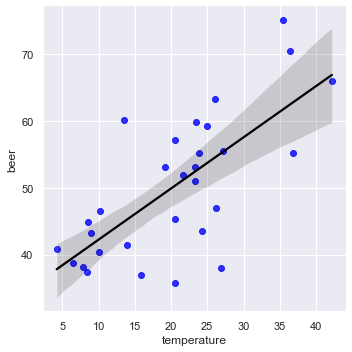

In [57]:
sns.lmplot(x = "temperature", y = "beer", data = beer,
           scatter_kws = {"color": "blue"}, line_kws    = {"color": "black"})

## 使用模型进行预测

模型的系数已经估计出来了，我们可以用它进行预测。估计完毕的模型可以用 predict 函数进行预测。当参数为空时，输出训练集对应的拟合值。

In [58]:
# 拟合值
lm_model.predict()

array([50.301, 53.746, 42.264, 55.2  , 46.704, 37.825, 44.943, 54.511,
       52.445, 41.116, 54.664, 49.23 , 53.21 , 52.445, 41.04 , 52.598,
       45.25 , 61.783, 55.43 , 50.301, 42.418, 50.301, 51.143, 40.657,
       66.911, 52.904, 62.854, 41.423, 62.472, 39.509])

在预测时可以指定气温的值，参数为数据帧。首先，计算当气温为 26 度时啤酒销售额的期望值

In [62]:
# 预测
lm_model.predict(pd.DataFrame({"temperature":[26]}))

0    54.511333
dtype: float64

我们可以用 lm_model.params 查看模型的参数，确认一下上述结果。

In [68]:
lm_model.params

Intercept      34.610215
temperature     0.765428
dtype: float64

In [72]:
# 不使用 predict 函数进行预测，气温为 26 度时的预测值
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
temperature = 26

beta0 + beta1 * temperature

54.511